# 1. Read, clean, and validate

## Dataframes and Series

In [1]:
import pandas as pd

In [2]:
df = pd.read_hdf('data/nsfg.hdf5', 'nsfg')

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


In [5]:
df.shape

(9358, 10)

In [6]:
df.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

In [7]:
pounds = df['birthwgt_lb1'] 
type(pounds)

pandas.core.series.Series

In [8]:
pounds.head()

0    5.0
1    4.0
2    5.0
3    NaN
4    8.0
Name: birthwgt_lb1, dtype: float64

## Clean and Validate

<img src="./data/img.jpg" alt="" width="800" align="left"/>
<img src="./data/img0.jpg" alt="" width="600" align="left"/>

In [9]:
ounces = df['birthwgt_oz1']

In [10]:
pounds.value_counts().sort_index()

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
98.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64

In [11]:
ounces.describe()

count    6391.000000
mean        7.213895
std         8.254885
min         0.000000
25%         3.000000
50%         6.000000
75%        11.000000
max        99.000000
Name: birthwgt_oz1, dtype: float64

In [12]:
import numpy as np
pounds = pounds.replace([98,99], np.nan)
ounces.replace([98,99], np.nan, inplace = True)

In [13]:
birth_weight = pounds + ounces/16.0
birth_weight.describe()

count    6355.000000
mean        7.120978
std         1.422236
min         0.000000
25%         6.375000
50%         7.187500
75%         8.000000
max        17.937500
dtype: float64

## Filter and Visualize

In [14]:
import matplotlib.pyplot as plt

plt.hist(birth_weight.dropna(), bins = 30)

plt.xlabel('Birth Weight (lb)')
plt.ylabel('fraction of birth')

plt.show()

<Figure size 640x480 with 1 Axes>

In [15]:
preterm = df['prglngth'] < 37
preterm.head()

0    False
1     True
2     True
3     True
4    False
Name: prglngth, dtype: bool

In [16]:
preterm.sum()

3742

In [17]:
preterm.mean()

0.39987176747168196

In [18]:
preterm_weight = birth_weight[preterm]
preterm_weight.mean()

5.577598314606742

In [19]:
full_term_weight = birth_weight[~preterm]
full_term_weight.mean()

7.372323879231473

**SAMPLING**

# 2. Distributions
## Probability mass function

In [20]:
gss = pd.read_hdf('data/gss.hdf5')
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


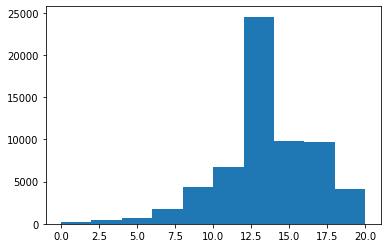

In [21]:
educ = gss['educ']

plt.hist(educ.dropna(), label = 'educ')

plt.show()

In [22]:
pmf_educ = educ.value_counts().sort_index()
pmf_educ

0.0       144
1.0        38
2.0       151
3.0       246
4.0       290
5.0       379
6.0       842
7.0       860
8.0      2421
9.0      1963
10.0     2819
11.0     3864
12.0    19145
13.0     5405
14.0     6980
15.0     2836
16.0     7953
17.0     1791
18.0     2109
19.0      774
20.0     1294
Name: educ, dtype: int64

In [23]:
pmf_educ[12]

19145

In [24]:
educ.value_counts(normalize = True).sort_index()

0.0     0.002311
1.0     0.000610
2.0     0.002424
3.0     0.003948
4.0     0.004655
5.0     0.006083
6.0     0.013514
7.0     0.013803
8.0     0.038858
9.0     0.031507
10.0    0.045246
11.0    0.062018
12.0    0.307284
13.0    0.086752
14.0    0.112031
15.0    0.045519
16.0    0.127648
17.0    0.028746
18.0    0.033850
19.0    0.012423
20.0    0.020769
Name: educ, dtype: float64

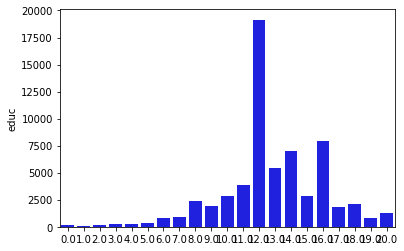

In [25]:
import seaborn as sns

sns.barplot(x = pmf_educ.index, y = pmf_educ, color = 'blue', )

plt.show()

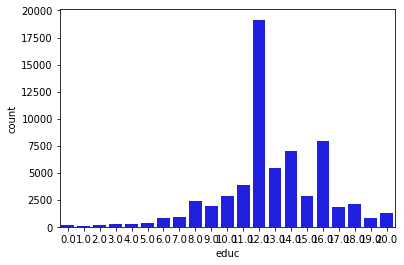

In [26]:
sns.countplot(x = 'educ', data = gss, color = 'blue')

plt.show()

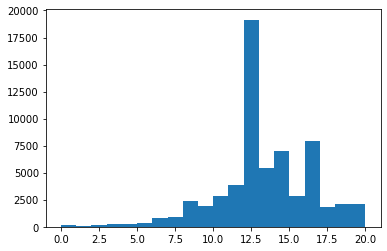

In [27]:
plt.hist(educ.dropna(), bins = 20)

plt.show()

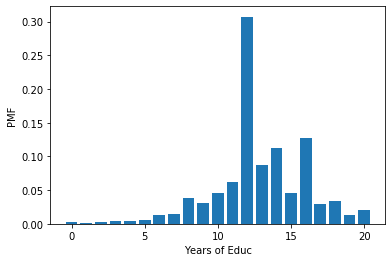

In [28]:
from empiricaldist import Pmf

pmf_educ = Pmf.from_seq(educ, normalize = True)

pmf_educ.bar()

plt.xlabel("Years of Educ")
plt.ylabel("PMF")

plt.show()

## Cumulative distribution functions

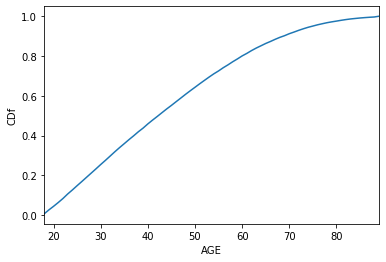

In [29]:
from empiricaldist import Cdf

age = gss['age']

cdf_age = Cdf.from_seq(age)

cdf_age.plot()

plt.xlabel("AGE")
plt.ylabel("CDf")

plt.show()

the prob of respondandt age being 51 or younger

In [30]:
p = cdf_age(51)
p

array(0.66020135)

what's the age below which are 75% of respondandt ages

In [31]:
age = cdf_age.inverse(0.75)
age

array(57.)

## Comparing distributions

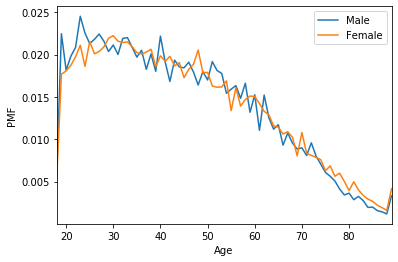

In [32]:
male = gss['sex'] == 1
female = ~male

male_age = gss.loc[male,'age']
female_age = gss.loc[female,'age']

Pmf.from_seq(male_age).plot(label = 'Male')
Pmf.from_seq(female_age).plot(label = 'Female')

plt.xlabel("Age")
plt.ylabel("PMF")
plt.legend()

plt.show()

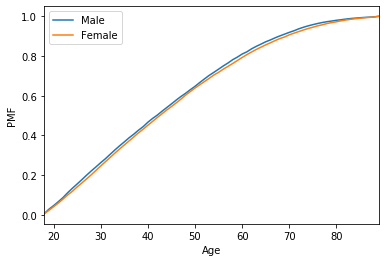

In [33]:
Cdf.from_seq(male_age).plot(label = 'Male')
Cdf.from_seq(female_age).plot(label = 'Female')

plt.xlabel("Age")
plt.ylabel("PMF")
plt.legend()

plt.show()

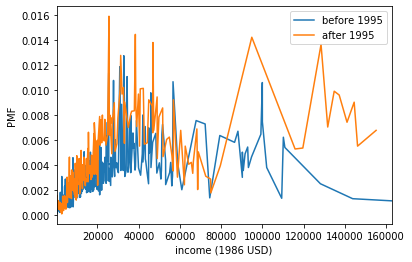

In [34]:
income = gss['realinc']
pre95 = gss['year'] < 1995

Pmf.from_seq(income[pre95]).plot(label = 'before 1995')
Pmf.from_seq(income[~pre95]).plot(label = 'after 1995')

plt.xlabel('income (1986 USD)')
plt.ylabel('PMF')
plt.legend()

plt.show()

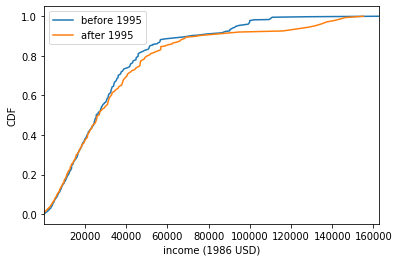

In [35]:
Cdf.from_seq(income[pre95]).plot(label = 'before 1995')
Cdf.from_seq(income[~pre95]).plot(label = 'after 1995')

plt.xlabel('income (1986 USD)')
plt.ylabel('CDF')
plt.legend()

plt.show()

##  Modeling distributions

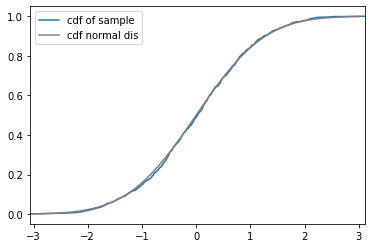

In [36]:
#draw a sample from normal distribution
sample = np.random.normal(size = 1000)
Cdf.from_seq(sample).plot(label = 'cdf of sample')

from scipy.stats import norm

#equaliy spaced points to calculate cdf at
points = np.linspace(-3,3)
#calc cdf for points of normal distribution of mean = 0 and std = 1
cdf_points = norm(0,1).cdf(points)
plt.plot(points, cdf_points, color = 'grey', label = 'cdf normal dis')

plt.legend()
plt.show()

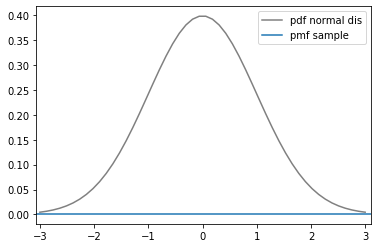

In [37]:
#pdf of the sample is flat line as the sample contains unique numbers

pdf = norm(0,1).pdf(points)
plt.plot(points, pdf, color = 'grey', label = 'pdf normal dis')
Pmf.from_seq(sample).plot(label = 'pmf sample')

plt.legend()
plt.show()

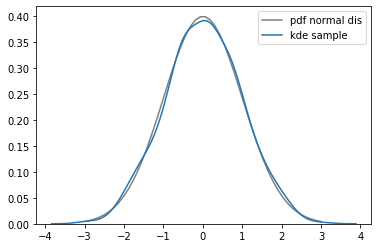

In [38]:
pdf = norm(0,1).pdf(points)
plt.plot(points, pdf, color = 'grey', label = 'pdf normal dis')
sns.kdeplot(sample, label = 'kde sample')

plt.legend()
plt.show()

# 3. Relationships
## Exploring relationships